In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Upload data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


We're using online retail data from kaggle, you can download the data [here](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. **If this code starts with the letter 'c', it indicates a cancellation.**
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.



In [ ]:
#Import the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Project/SaaS Dataset Generation/Matriculation Class/online_retail_II.csv')
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# EDA

In [ ]:
#Check cancelled transaction
cancelled_transaction = dataset[dataset['Invoice'].str.contains('C')]
print("Number of cancelled invoice: ", cancelled_transaction['Invoice'].nunique())
print("Maximum Quantity of cancelled invoice: ", cancelled_transaction['Quantity'].max())
print("Minimum Quantity of cancelled invoice: ", cancelled_transaction['Quantity'].min())
print("Average Quantity of cancelled invoice: ", cancelled_transaction['Quantity'].mean())
cancelled_transaction

Number of cancelled invoice:  8292
Maximum Quantity of cancelled invoice:  1
Minimum Quantity of cancelled invoice:  -80995
Average Quantity of cancelled invoice:  -25.186826715912588


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


* Shows that there are 8292 unique invoice that cancelled in the data, with most of the quantity is negative (max 1, min -80995, and average -25.18). 
* This data couldn't be used to calculate price elasticity, because it has negative quantity and not valid transaction

In [ ]:
nan_cust = dataset[dataset['Customer ID'].isna()]
print(nan_cust.agg({'Invoice':'nunique', 'StockCode':'nunique'}))
nan_cust

Invoice      8752
StockCode    5177
dtype: int64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


* Shows that there are 8752 unique invoice that have no customer, with 5177 product/ Stock Code purchased. 
* This data indicate some invalidity due to the context of online retail that need to login to purchased. So they might have some problem to record the data. We can exclude for this case, because we want to calculate the valid transaction only.

In [ ]:
country = dataset.groupby('Country').agg({'Invoice':'nunique'}).sort_values('Invoice', ascending=False).reset_index()
country['Percentage'] = (country['Invoice'] / country['Invoice'].sum())*100
country.head(5)

,Country,Invoice,Percentage
0,United Kingdom,49108,91.571567
1,Germany,1095,2.041844
2,EIRE,806,1.502946
3,France,746,1.391064
4,Netherlands,250,0.466174


* Shows that United Kingdom held majority of the transaction, 91.5% transaction is from UK
* UK data is sufficient for us to do this analysis, we're not processing too much transaction

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


* Some of the columns not have approriate data type

# Preprocessing

In [ ]:
# Delete cancelled transaction
dataset = dataset[~dataset['Invoice'].str.contains('C')]
# Delete transaction with nan customer
dataset = dataset[dataset['Customer ID'].notna()]
# Cut the data to focus on United Kingdom
dataset = dataset[dataset['Country']=='United Kingdom']

dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
# Change data type
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate']).dt.date
dataset['Customer ID'] = dataset['Customer ID'].astype(int).astype(str)

# Add amount variable (quantity x price)
dataset['Amount'] = dataset['Quantity'] * dataset['Price']

# Add monthyear to cut off the data only in December 2009 (practical example purposes only, so there is not much data to process)
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M').dt.to_timestamp()
dataset = dataset[dataset.monthyear=="2009-12-01"]

In [ ]:
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,monthyear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.00,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,100.80,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,30.00,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
45219,493407,21993,FLORAL FOLK STATIONERY SET,1,2009-12-23,2.95,17867,United Kingdom,2.95,2009-12-01
45220,493407,21992,VINTAGE PAISLEY STATIONERY SET,1,2009-12-23,2.95,17867,United Kingdom,2.95,2009-12-01
45221,493407,21991,BOHEMIAN COLLAGE STATIONERY SET,1,2009-12-23,2.95,17867,United Kingdom,2.95,2009-12-01
45222,493407,21034,REX CASH+CARRY JUMBO SHOPPER,10,2009-12-23,0.95,17867,United Kingdom,9.50,2009-12-01


In [ ]:
# Eda to know the profile for each product (StockCode), we just use top 100 product with highest amount
eda = dataset.groupby('StockCode').agg({'Invoice':'nunique', 'Customer ID':'nunique', 'Amount':'sum', 'Price':["min","max","mean","nunique"]}).reset_index()
eda.columns = ["StockCode", "transaction", "unique_customer", "sum_amount", "min_price", "max_price", "mean_price","nunique_price"]
eda = eda.sort_values('sum_amount', ascending=False).head(100)
eda

,StockCode,transaction,unique_customer,sum_amount,min_price,max_price,mean_price,nunique_price
2357,85123A,266,212,15055.96,2.36,2.95,2.839321,3
19,15056BL,60,43,8073.95,3.00,5.95,5.578676,4
1149,22086,131,110,7549.40,2.00,2.95,2.896739,3
2152,84879,90,79,7055.57,1.45,1.69,1.663913,2
1172,22111,182,145,6417.60,4.25,4.95,4.855405,2
...,...,...,...,...,...,...,...,...
1073,21981,15,15,1225.29,0.25,0.29,0.287778,2
1170,22109,48,42,1211.64,3.39,3.75,3.685200,2
197,20725,67,56,1201.00,1.45,1.65,1.647059,2
806,21622,41,39,1188.00,4.95,4.95,4.950000,1


In [ ]:
product = eda['StockCode'].to_list()

#Cut off product to only top 100 sales 
dataset = dataset[dataset['StockCode'].isin(product)]

In [ ]:
# To calculate the elasticity, we aggregate the average quantity (demand) purchased per day. 
# This aggregation used because the transaction in retail based on daily transaction. 
# To tackle the problem of elasticity subject to specific direction. We need to aggregate average (mid point method)

ped_data = dataset.groupby(['StockCode', 'Price']).agg({"Quantity":"sum","InvoiceDate":"nunique"}).reset_index()
ped_data["quantity_per_day"] = round(ped_data["Quantity"] / ped_data["InvoiceDate"], 2)
ped_data.columns = ['StockCode', 'Price', 'sum_quantity', 'nunique_date', 'quantity_per_day']
ped_data

,StockCode,Price,sum_quantity,nunique_date,quantity_per_day
0,15056BL,3.00,1200,2,600.00
1,15056BL,4.60,240,1,240.00
2,15056BL,4.95,444,7,63.43
3,15056BL,5.95,197,18,10.94
4,15056N,3.00,1200,2,600.00
...,...,...,...,...,...
228,M,10.00,2,1,2.00
229,M,15.95,1,1,1.00
230,M,68.96,1,1,1.00
231,M,74.10,1,1,1.00


In [ ]:
#Delete product that has only one day sales (probably flash sale) to make it the duration of sales is fair for all products.
one_day = ped_data[ped_data['nunique_date']==1]['StockCode'].to_list()
ped_data = ped_data[~ped_data['StockCode'].isin(one_day)]
ped_data = ped_data[ped_data['Price']!=0].reset_index()

In [ ]:
#Delete product that has one variation of price
ped_data = ped_data[ped_data.duplicated(subset=['StockCode'], keep=False)]
ped_data

,index,StockCode,Price,sum_quantity,nunique_date,quantity_per_day
0,4,15056N,3.00,1200,2,600.00
1,5,15056N,4.95,210,5,42.00
2,6,15056N,5.95,141,13,10.85
3,11,16014,0.32,4520,3,1506.67
4,12,16014,0.42,20,2,10.00
...,...,...,...,...,...,...
137,215,85099B,1.95,1096,18,60.89
138,216,85099C,1.65,900,4,225.00
139,217,85099C,1.95,425,16,26.56
140,218,85099F,1.65,500,4,125.00


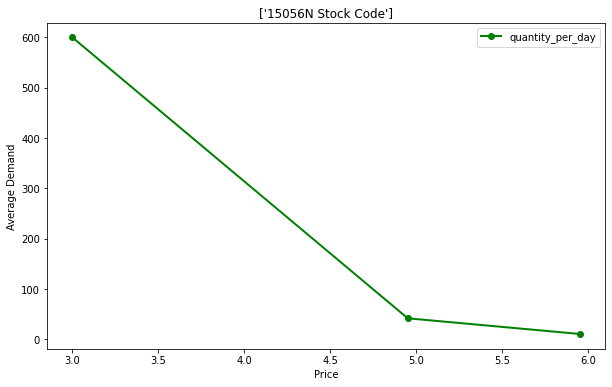

In [ ]:
#Visualize relation between average demand and price

quantity_filter = ped_data[ped_data.StockCode=="15056N"]
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['axes.grid'] = False
plt.plot( 'Price', 'quantity_per_day', data=quantity_filter, marker='o', color='green', linewidth=2)
plt.xlabel("Price")
plt.ylabel("Average Demand")
plt.title(quantity_filter['StockCode'].unique() + " Stock Code")
plt.legend()

## PED Theory

Log log model equation for price elasticity of demand
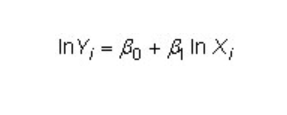

With this equation, before do the regression model we need to convert the x (price) and y (demand) to the logarithmic form

So, if we have this equation it means that:
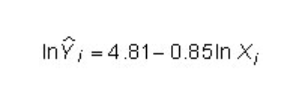

The elasticity is –0.85, so a 1 percent increase in the price is associated with a 0.85 percent decrease in quantity demanded (sales), on average.

> Coefficient of X is the elasticity





# PED Model

In [ ]:
#Calculate price elasticity for one product

# filter a product
data_filter = ped_data[ped_data.StockCode=="15056N"]

# Log the x (price) and y (demand) before fed to linear regression model to make it log log regression
x = np.log(data_filter['Price']).values.reshape(-1,1)
y = np.log(data_filter['quantity_per_day']).values.reshape(-1,1)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg = LinearRegression().fit(x,y)
adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )

print(float(reg.coef_))
print(float(reg.intercept_))
print(reg.score(x,y))
print(adj_r2score)

-5.744233314382083
12.753640105868296
0.9943437175676755
0.988687435135351


In [ ]:
ped_result = pd.DataFrame()

# Calculate for all product
def price_elasticity(product):
    data_filter = ped_data[ped_data.StockCode==product]
    x = np.log(data_filter['Price']).values.reshape(-1,1)
    y = np.log(data_filter['quantity_per_day']).values.reshape(-1,1)

    reg = LinearRegression().fit(x,y)
    adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )

    ped_result["StockCode"] = [product]
    ped_result["intercept"] = float(reg.intercept_)
    ped_result["unique_price"] = data_filter['quantity_per_day'].nunique()
    ped_result["elasticity"] = float(reg.coef_)
    ped_result["rsquared_adj"] = adj_r2score
    
    return ped_result

In [ ]:
# Create model for all products
product_list = ped_data.StockCode.unique()
result = pd.DataFrame()

for x in range(0,len(product_list)):
    result = result.append(price_elasticity(product_list[x]))

<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encountered in double_scalars
  adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encountered in double_scalars
  adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encountered in double_scalars
  adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encountered in double_scalars
  adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encountered in double_scalars
  adj_r2score = 1 - ( 1-reg.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
<ipython-input-14-5b68a2f874a9>:10: RuntimeWarning: invalid value encounter

In [ ]:
result

,StockCode,intercept,unique_price,elasticity,rsquared_adj
0,15056N,12.753640,3,-5.744233,0.988687
0,16014,-13.696085,2,-18.442259,NaN
0,20747,40.635847,2,-14.495276,NaN
0,20828,15.666073,2,-14.028917,NaN
0,20914,9.296214,2,-5.795376,NaN
...,...,...,...,...,...
0,85014A,12.789212,3,-5.835055,0.997335
0,85014B,12.279011,3,-5.427531,0.990493
0,85099B,10.192538,2,-9.109316,NaN
0,85099C,11.821233,2,-12.790433,NaN


In [ ]:
result[result.rsquared_adj.isna()]

,StockCode,intercept,unique_price,elasticity,rsquared_adj
0,16014,-13.696085,2,-18.442259,NaN
0,20747,40.635847,2,-14.495276,NaN
0,20828,15.666073,2,-14.028917,NaN
0,20914,9.296214,2,-5.795376,NaN
0,20971,7.019049,2,-16.797888,NaN
...,...,...,...,...,...
0,84968E,64.748970,2,-25.436329,NaN
0,84997B,25.950321,2,-17.753214,NaN
0,85099B,10.192538,2,-9.109316,NaN
0,85099C,11.821233,2,-12.790433,NaN


There is 63 products (Stock Code that has NaN adjective rsquared values)

Why this is happen?

**Nan values in rsquared because it only has two data points**

From https://stackoverflow.com/questions/64552658/why-do-i-get-nan-when-using-sklearn-r2-function, stated that:

> With only one sample both the nominator and the denominator of the fraction are 0, leading to a 0/0 division, which is indeed a nan (computationally, as well as mathematically).


* you should not use only a single pair of data to compute R^2
* batch together more pairs of predictions & ground truth samples in order to get meaningful R^2 results.

**Then, is the product elasticity not valid?**

The calculation for the elasticity is still valid. But in terms of regression it shows that data points not fit a curve or line

In [ ]:
#Summary the elasticity, normal price, and it's quantity_per_day for each product (StockCode)

result = result.merge(ped_data[["StockCode", "Price",	"quantity_per_day"]],
                       on="StockCode")

result_ped = result.sort_values('Price', ascending=False).drop_duplicates('StockCode').reset_index()
result_ped = result_ped[['StockCode', 'elasticity', 'Price', 'quantity_per_day']]
result_ped

,StockCode,elasticity,Price,quantity_per_day
0,20747,-14.495276,14.95,4.18
1,84968D,-24.238356,12.75,1.50
2,84968E,-25.436329,12.75,1.00
3,21258,-7.671931,12.75,3.08
4,21843,-12.445058,10.95,9.11
...,...,...,...,...
62,20971,-16.797888,1.25,26.33
63,21232,-3.017265,1.25,83.67
64,21212,-3.637279,0.55,100.00
65,16014,-18.442259,0.42,10.00


In [ ]:
result_ped[result_ped['StockCode']=='15056N']

,StockCode,elasticity,Price,quantity_per_day
18,15056N,-5.744233,5.95,10.85


# What's Next?

We can try to make a simulation for each product with the elasticity, price and quantity value to get **the optimum price** for each product.

The example of the simulation can be access [here](https://docs.google.com/spreadsheets/d/1ryb5jjnqjgtUYHOeWTJcRfB-Gd7Q-QKbI7JN3lHLP08/edit?usp=sharing)